# Understanding the problem

Our goal is to create a predictor that will give us the outcome of chess games given the players and having some historical data.

When predicting the outcome of chess games, you typically need two things:

1. a rating system wherein the current ability of each player is estimated based on past results,
2. a model for estimating the expected score for each player, once you know their ratings.

# Elo ratings
Most rating systems use some methodology to determine initial "seed" ratings for the pool of players, and then update those ratings based on ongoing results.  The most famous approach is the Elo approach, where the applied change to a player's rating is proportional to the amount by which they exceed their aggregate expected score across all their recent games.  The scaling factor is known as the "K-factor", basically a measure of how strong a match will impact the players’ ratings. If you set K too low the ratings will hardly be impacted by the matches and very stable ratings (too stable) will occur, so the K-factor is highest for new players and lowest for topmost players.
There are three steps to generating Elo ratings:

1. Expected score: predict the outcome of a game.
2. Actual score: observe the outcome.
3. Update: increase or decrease each player’s rating based on result.

More mathematical details and formulas here: https://en.wikipedia.org/wiki/Elo_rating_system

## K factor
K is the development coefficient. From FIDE we have these proposals:

K = 40 for a player new to the rating list until he has completed events with at least 30 games

K = 20 as long as a player's rating remains under 2400.

K = 10 once a player's published rating has reached 2400 and remains at that level subsequently, even if the rating drops below 2400.

K = 40 for all players until their 18th birthday, as long as their rating remains under 2300.

K = 20 for RAPID and BLITZ ratings all players.

The initial seed ratings are typically determined through a simultaneous calculation: a start rating is assumed for each player, then a "performance rating" is calculated for each player based on their results and the ratings of their opponents, and then those performance ratings are fed back into another iteration as the start ratings.  This is allowed to run until it converges upon a stable set of ratings. All top players have a K-factor of 10.

## Performance rating
Performance rating or special rating is a hypothetical rating that would result from the games of a single event only. Some chess organizations use the "algorithm of 400" to calculate performance rating. According to this algorithm, performance rating for an event is calculated in the following way:

- For each win, add your opponent's rating plus 400,
- For each loss, add your opponent's rating minus 400,
- And divide this sum by the number of played games.

The formula to compute the performance rating is:

per_rating = (Total opponents' ratings + 400 (Wins - Losses)) / Nr. games 

# New players or with no rating

For new players with no rating information we need to take a provisional rating. The deadline to remove a provisional rating depends on the taken approach:

* USDF says the player needs to play at least 20 games
* FIDE says the player needs to play longer than 6 months

We prefer the USDF approach because we cannot guarantee that during 6 months the player is going to play a minimum number of games.

## While training
We will use a provisional rating of 1000 til the number of played games by the player is 20. Then we will compute the performance rating and remove the provisional one.

## While testing
When we are making predictions and we do not know the results, we cannot update any rating for the player so we will take the default rating of 1000.

## Hill-climbing approach to update ratings
https://www.educba.com/hill-climbing-algorithm/

We have the average of the opponents ratings of a player.
We can adjust the player's own score with this average. How? Using the Hill-climbing Algorithm idea:

"a simple strategy by comparing the neighbor with the current state, and if the neighbor is heuristically better, it will accept the neighbor state."

# Initial approach

We are going to compute the Elo rating for the given players from 2014, using the initial provided ratings, til January 2020. These ratings will be the most updated ones according to the processed games and could be used to predict the outcomes of new games at the beginning of year 2020. Besides, the elo ratings of top players in 2020 are given as well, and we assume these are computed at the end of the year. Thus we could compare the difference between the initial Elo rating on the 1st of January 2020 (computed thanks to the training dataset) and the final rating of the year 2020 and use this information to compute a final 2020 performance factor. This factor could be used to adjust the rating of the player before computing the probability. 

## Winner predictor
We will use the saved most recent ratings of the corresponding year the game was played and predict based on those rating values following the probability formula explained later.

# Probability of winning a game
A nice thing about the rating system is that you can easily estimate the win probabilities given the difference in Elo rating of the opponents. So if the difference is zero (opponents of equal strength), the win probability is obviously 0.5 = 50 %. If one player has a 200 Elo points advantage, his win probability is about 76 %. This is the function that shapes this probability.

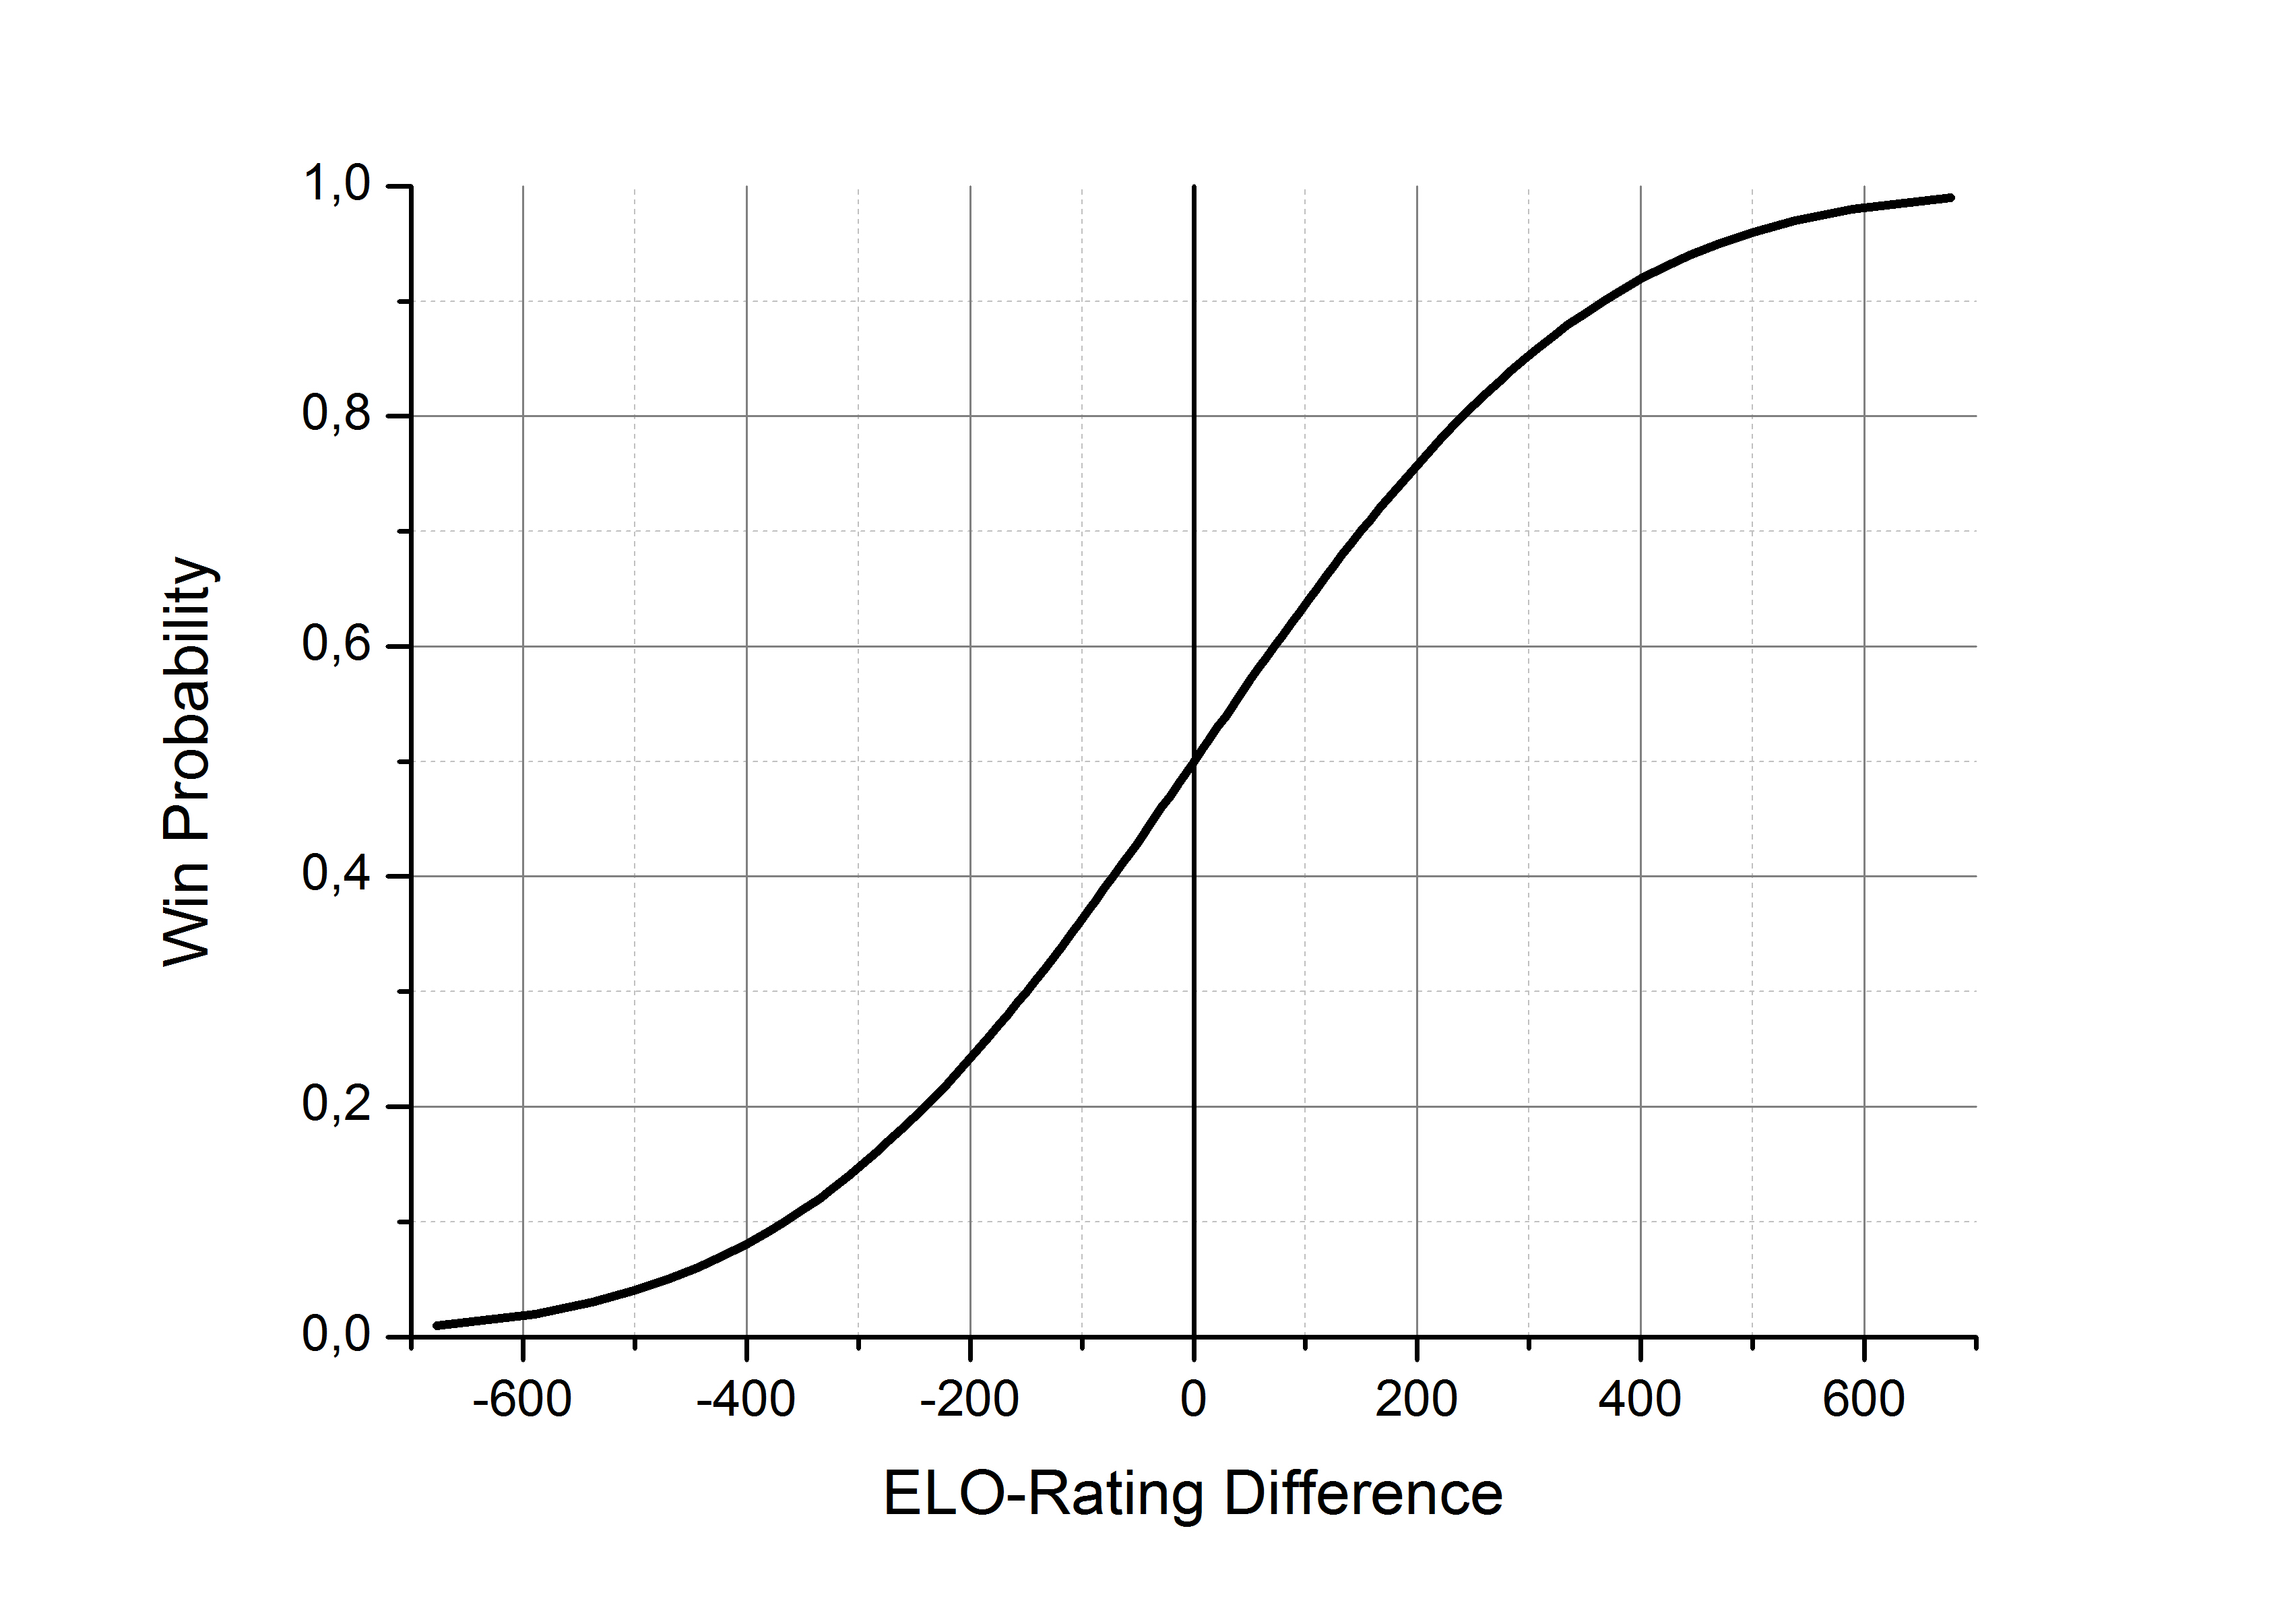

In [10]:
from IPython.display import Image, display
display(Image('prob.jpg', width=600, height=500))

To model this function, there is a formula, given the elo rating difference, r:

p = 1 / (10^(-r/400) + 1)

That could be used to compute the winning probability. Besides for the white player a bonus should be given because of the slight advantage. As explained here:

http://www.eloratings.net/about

But we will try this adjustment when evaluating the predictors.

# Four predictors to test

After presenting all these ideas, we decided to evaluate four ways to compute the ratings. For all unrated players we start with some provisional ratings and we followed the accepted FIDE rules and formulas to update ratings.

1. Predictor v1: using separate ratings for classic and rapic games so each player has two ratings one for classic and another one for rapid. We need to give some initial rapid rating for all players. For the top players we give a lower but close to the classic rating one. For the others the default of 1000.

2. Predictor v2: same as predictor v1 but incorporating the Hill-climbing approach when updating ratings (if the rating is not provisional).

3. Predictor v3: using only one rating for both games no matter the game type.

4. Predictor v4: the same as v3 but incorporates the hill-climbing algorithm for updating ratings.

# Other approaches


It was suggested in one kaggle competition (https://www.kaggle.com/competitions/chess/discussion/186) the library TrueSkill (https://pypi.org/project/trueskill/) as a way to rank players but some drawbacks were identified in this approach:

1. It follows a different rating so we needed to adapt the elo ratings to the specific values (mu, sigma) of this algorithm.
2. It was pointed out by users of this algorithm that needs a correction from some code written in another language.

Given the short time to finish this project, we discarded this interesting approach and went through the classical implementation of the Elo System and the updating ratings approach recognized by the international chess game federation.

# Resources
http://www.glicko.net/research/acjpaper.pdf

https://trueskill.org/

## Elo system

https://en.wikipedia.org/wiki/Elo_rating_system

https://metinmediamath.wordpress.com/2013/11/27/how-to-calculate-the-elo-rating-including-example/

https://www.kaggle.com/c/chess

https://www.sciencedirect.com/science/article/pii/S2210832717301485

## Computing win probability
https://metinmediamath.wordpress.com/2013/11/12/sports-elo-rating-and-win-probability-carlsen-vs-anand/

https://nicidob.github.io/nba_elo/

https://fivethirtyeight.com/features/introducing-nfl-elo-ratings/

http://www.moserware.com/2010/03/computing-your-skill.html

# FIDE
https://ratings.fide.com/calc.phtml?page=change

